In [21]:
import re as splitter

In [22]:
ds=sc.textFile('s3://vivek2511/devicestatus.txt')

In [23]:
dssplit=ds.map(lambda v:(splitter.split('[/|:,]',v)));

In [24]:
dsdf=dssplit.toDF()

In [25]:
dsdf.show(26)

+----------+---+---+---+--------------------+--------------------+---+---+---+-------+---------+---------+---------+--------+---------+-------------+--------------+
|        _1| _2| _3| _4|                  _5|                  _6| _7| _8| _9|    _10|      _11|      _12|      _13|     _14|      _15|          _16|           _17|
+----------+---+---+---+--------------------+--------------------+---+---+---+-------+---------+---------+---------+--------+---------+-------------+--------------+
|2014-03-15| 10| 10| 20|       Sorrento F41L|8cc3b47e-bd01-448...|  7| 24| 39|enabled| disabled|connected|       55|      67|       12|33.6894754264|-117.543308253|
|2014-03-15| 10| 10| 20|          MeeToo 1.0|ef8c7564-0a1a-465...|  0| 31| 63|     70|       39|       27|  enabled| enabled|  enabled|37.4321088904|-121.485029632|
|2014-03-15| 10| 10| 20|          MeeToo 1.0|23eba027-b95a-472...|  0| 20| 21|     86|       54|       34|  enabled| enabled|  enabled|39.4378908349|-120.938978486|
|2014-03-1

In [26]:
pdds=dsdf.toPandas()

In [27]:
pdds.head()

,_1,_2,_3,_4,_5,_6,_7,_8,_9,_10,_11,_12,_13,_14,_15,_16,_17
0,2014-03-15,10,10,20,Sorrento F41L,8cc3b47e-bd01-4482-b500-28f2342679af,7,24,39,enabled,disabled,connected,55,67,12,33.6894754264,-117.543308253
1,2014-03-15,10,10,20,MeeToo 1.0,ef8c7564-0a1a-4650-a655-c8bbd5f8f943,0,31,63,70,39,27,enabled,enabled,enabled,37.4321088904,-121.485029632
2,2014-03-15,10,10,20,MeeToo 1.0,23eba027-b95a-4729-9a4b-a3cca51c5548,0,20,21,86,54,34,enabled,enabled,enabled,39.4378908349,-120.938978486
3,2014-03-15,10,10,20,Sorrento F41L,707daba1-5640-4d60-a6d9-1d6fa0645be0,8,22,60,enabled,enabled,disabled,68,91,17,39.3635186767,-119.400334708
4,2014-03-15,10,10,20,Ronin Novelty Note 1,db66fe81-aa55-43b4-9418-fc6e7a00f891,0,13,47,70,enabled,enabled,enabled,10,45,33.1913581092,-116.448242643


In [28]:
pdds=pdds[['_16','_17','_1','_2','_3','_4','_5','_6']]

In [29]:
pdds.head()

,_16,_17,_1,_2,_3,_4,_5,_6
0,33.6894754264,-117.543308253,2014-03-15,10,10,20,Sorrento F41L,8cc3b47e-bd01-4482-b500-28f2342679af
1,37.4321088904,-121.485029632,2014-03-15,10,10,20,MeeToo 1.0,ef8c7564-0a1a-4650-a655-c8bbd5f8f943
2,39.4378908349,-120.938978486,2014-03-15,10,10,20,MeeToo 1.0,23eba027-b95a-4729-9a4b-a3cca51c5548
3,39.3635186767,-119.400334708,2014-03-15,10,10,20,Sorrento F41L,707daba1-5640-4d60-a6d9-1d6fa0645be0
4,33.1913581092,-116.448242643,2014-03-15,10,10,20,Ronin Novelty Note 1,db66fe81-aa55-43b4-9418-fc6e7a00f891


In [30]:
pdds['_1'] = pdds['_1'].str.cat(pdds['_2'],sep="-").str.cat(pdds['_3'],sep="-").str.cat(pdds['_4'],sep="-")

In [31]:
pdds=pdds[['_16','_17','_1','_5','_6']]

In [32]:
pdds.columns=['latitude','longitude','date','model','deviceID']

In [33]:
pdds

,latitude,longitude,date,model,deviceID
0,33.6894754264,-117.543308253,2014-03-15-10-10-20,Sorrento F41L,8cc3b47e-bd01-4482-b500-28f2342679af
1,37.4321088904,-121.485029632,2014-03-15-10-10-20,MeeToo 1.0,ef8c7564-0a1a-4650-a655-c8bbd5f8f943
2,39.4378908349,-120.938978486,2014-03-15-10-10-20,MeeToo 1.0,23eba027-b95a-4729-9a4b-a3cca51c5548
3,39.3635186767,-119.400334708,2014-03-15-10-10-20,Sorrento F41L,707daba1-5640-4d60-a6d9-1d6fa0645be0
4,33.1913581092,-116.448242643,2014-03-15-10-10-20,Ronin Novelty Note 1,db66fe81-aa55-43b4-9418-fc6e7a00f891
...,...,...,...,...,...
99995,38.4282665514,-121.25933863,2014-03-15-10-49-30,Ronin S2,b13ece99-62ab-4c9f-a366-6a06bd5e877f
99996,37.5589514366,-121.212136808,2014-03-15-10-49-30,Titanic 2400,e683c864-2c49-46dd-8aa4-4f10364f3cd2
99997,33.7778202246,-108.575470704,2014-03-15-10-49-30,Sorrento F41L,32af1a0b-ca7f-4906-9772-9eb9435e7e4c
99998,38.2596913494,-122.295712621,2014-03-15-10-49-30,Ronin S1,a48a5559-d916-481b-84a9-5dce6272cce1


In [34]:
pdds=pdds.dropna()

In [35]:
pdds=pdds[pdds.latitude!=0]
pdds=pdds[pdds.longitude!=0]

In [36]:
pdds.head()

,latitude,longitude,date,model,deviceID
0,33.6894754264,-117.543308253,2014-03-15-10-10-20,Sorrento F41L,8cc3b47e-bd01-4482-b500-28f2342679af
1,37.4321088904,-121.485029632,2014-03-15-10-10-20,MeeToo 1.0,ef8c7564-0a1a-4650-a655-c8bbd5f8f943
2,39.4378908349,-120.938978486,2014-03-15-10-10-20,MeeToo 1.0,23eba027-b95a-4729-9a4b-a3cca51c5548
3,39.3635186767,-119.400334708,2014-03-15-10-10-20,Sorrento F41L,707daba1-5640-4d60-a6d9-1d6fa0645be0
4,33.1913581092,-116.448242643,2014-03-15-10-10-20,Ronin Novelty Note 1,db66fe81-aa55-43b4-9418-fc6e7a00f891


In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig=plt.figure(figsize=(12,9))

m=Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-90,90,10),labels=[True,False,False,False])
m.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1])
m.scatter(pdds['longitude'].tolist(),pdds['latitude'].tolist(),latlon=True)
plt.title('Basemap tutorial',fontsize=20)
plt.show()

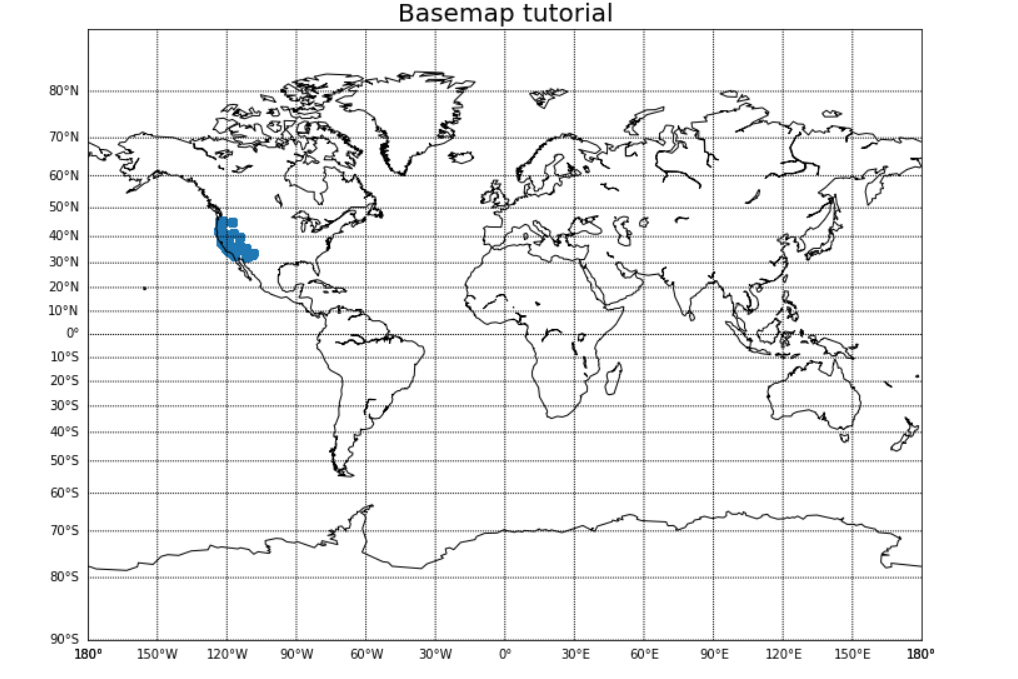